<strong>avant de commencer , on a fait une concaténation de deux classes 'tr_fraudes' et 'tr_normales' , le résultat de la concaténation était 'cleaned_data.csv' , ce dataset commence avec toutes les transactions normales (étiquetées avec 0) jusqu'au milieu, suivi de toutes les transactions frauduleuses (étiquetées avec 1) à partir du milieu jusqu'à la fin .
</strong>
<strong>
dans ce cas ,  on doit élanger les données de manière aléatoire avant de diviser en ensembles d'entraînement et de test. </strong>
<strong>
Cela garantit que les ensembles de données contiennent un mélange représentatif des deux classes et évite que le modèle ne se base uniquement sur l'ordre des transactions pour prendre des décisions.
</strong>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Dataframe
dataset =pd.read_csv('cleaned_data.csv')


In [3]:
# d'abord nous voulons mélanger le dataset en fonction de la colonne 'isFraud' utilisant sort_values()
# La méthode sort_values() est une fonctionnalité existe sur Pandas.
# Elle est utilisée pour trier un DataFrame ou une série en fonction des valeurs d'une ou plusieurs colonnes.

In [4]:
data_melang = dataset.sort_values(by='isFraud').sample(frac=1, random_state=5)

In [5]:
#faire une copie 
data = data_melang.copy()

In [6]:
data.head()

,type,amount,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
9381,1,11272.74,52250.00,1,0.00,0,0
12196,5,226193.35,1331498.39,0,548993.70,0,0
2799,2,4720554.95,4720554.95,0,0.00,1,0
6094,3,1688761.08,1688761.08,0,0.00,1,0
13118,5,455427.69,14409380.62,0,8565657.72,0,0


In [7]:
data.columns

Index(['type', 'amount', 'oldbalanceOrg', 'nameDest', 'oldbalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [8]:
# features
x = data.drop('isFraud',axis=1)

# target
y = data['isFraud']

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [10]:
x.head()

,type,amount,oldbalanceOrg,nameDest,oldbalanceDest,isFlaggedFraud
9381,1,11272.74,52250.00,1,0.00,0
12196,5,226193.35,1331498.39,0,548993.70,0
2799,2,4720554.95,4720554.95,0,0.00,0
6094,3,1688761.08,1688761.08,0,0.00,0
13118,5,455427.69,14409380.62,0,8565657.72,0


# l'Apprentissage Automatique :

Entraînement du modèle : Decision Tree
Temps d'entraînement : 0.12 secondes
Entraînement terminé. Évaluation en cours...
Temps d'évaluation : 0.00 secondes
Entraînement du modèle : Random Forest
Temps d'entraînement : 3.53 secondes
Entraînement terminé. Évaluation en cours...
Temps d'évaluation : 0.13 secondes
Entraînement du modèle : KNN
Temps d'entraînement : 0.06 secondes
Entraînement terminé. Évaluation en cours...
Temps d'évaluation : 0.30 secondes
Entraînement du modèle : Logistic Regression
Temps d'entraînement : 0.11 secondes
Entraînement terminé. Évaluation en cours...
Temps d'évaluation : 0.01 secondes
Entraînement du modèle : XGBoost
Temps d'entraînement : 1.31 secondes
Entraînement terminé. Évaluation en cours...
Temps d'évaluation : 0.01 secondes
Modèle : Decision Tree
Exactitude : 0.98
F1-Score : 0.98
Précision : 0.98
Matrice de Confusion:
[[1612   35]
 [  20 1619]]


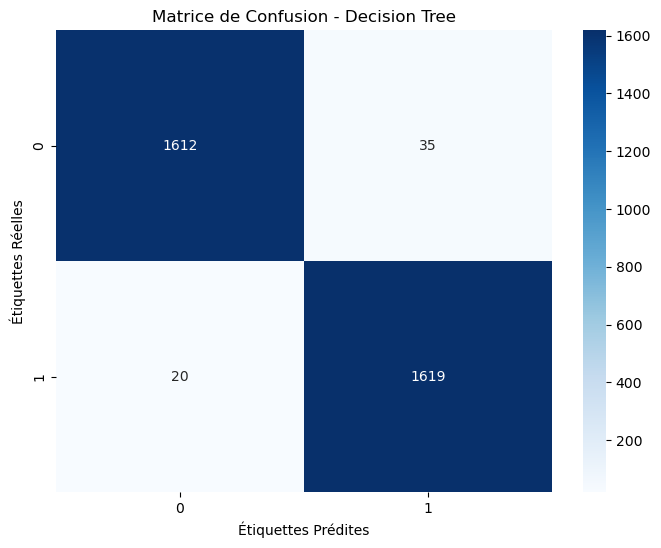

Modèle : Random Forest
Exactitude : 0.99
F1-Score : 0.99
Précision : 0.99
Matrice de Confusion:
[[1608   39]
 [   5 1634]]


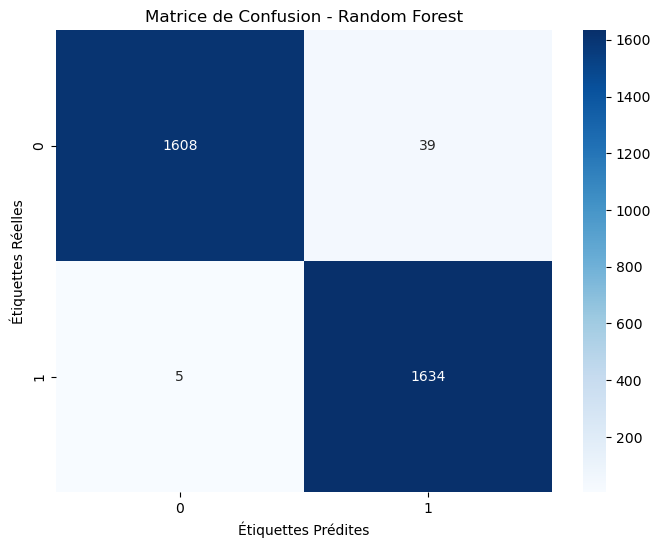

Modèle : KNN
Exactitude : 0.96
F1-Score : 0.96
Précision : 0.96
Matrice de Confusion:
[[1563   84]
 [  62 1577]]


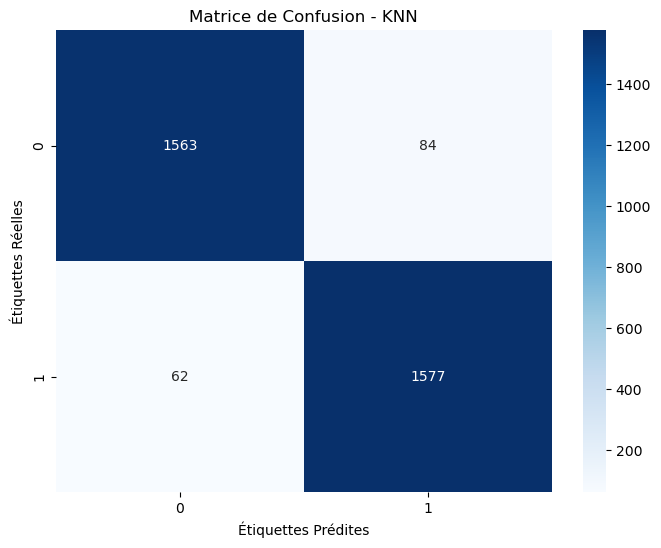

Modèle : Logistic Regression
Exactitude : 0.64
F1-Score : 0.62
Précision : 0.70
Matrice de Confusion:
[[ 639 1008]
 [ 159 1480]]


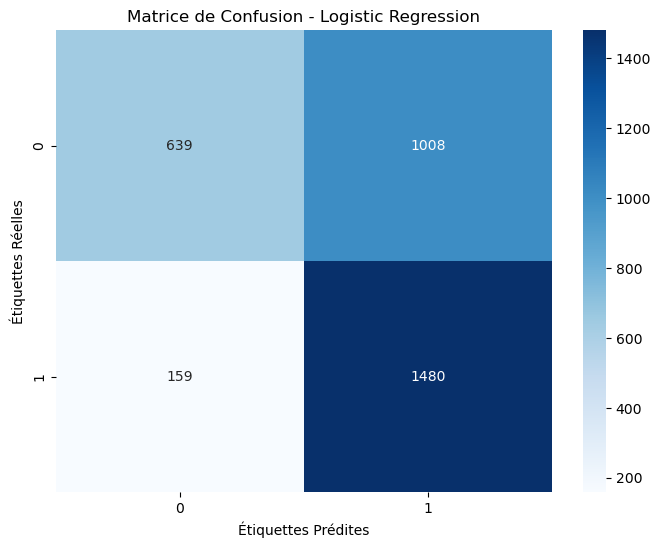

Modèle : XGBoost
Exactitude : 0.99
F1-Score : 0.99
Précision : 0.99
Matrice de Confusion:
[[1619   28]
 [   4 1635]]


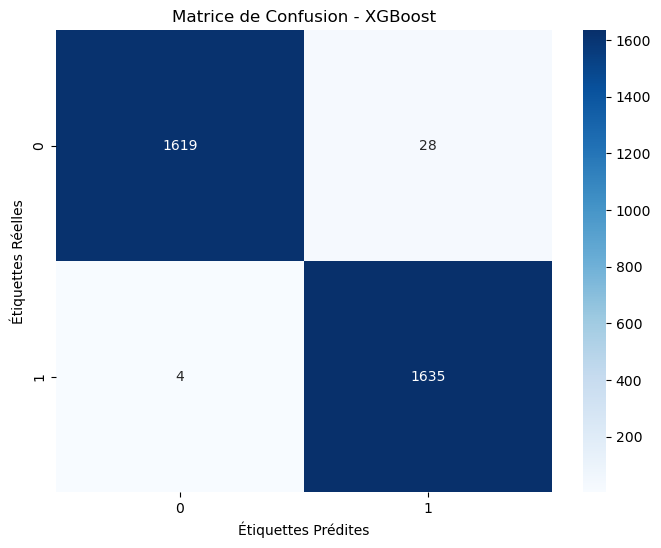

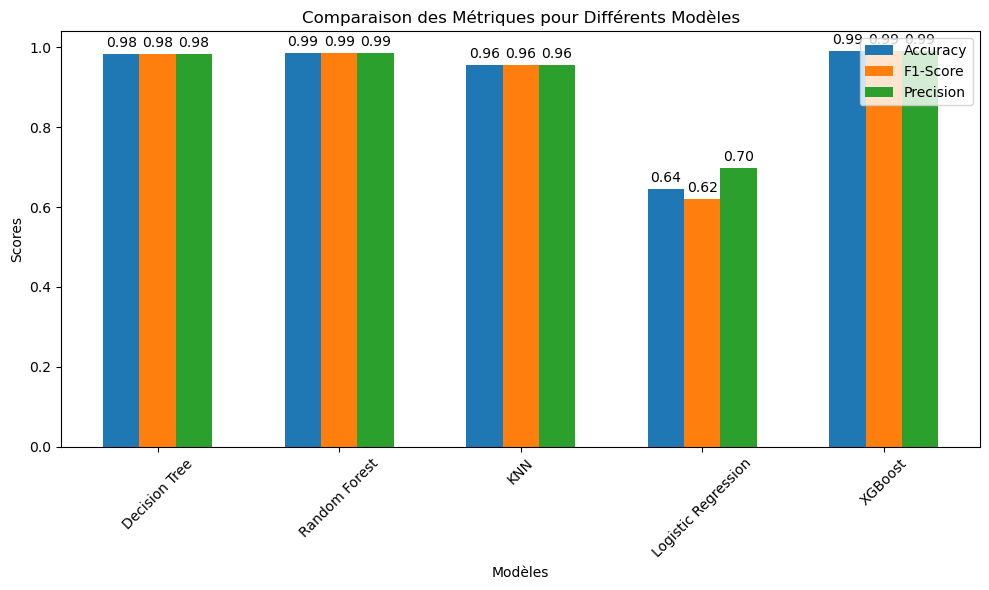

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import time

# divisier (Split) nos données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Liste des modèles
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('XGBoost', xgb.XGBClassifier(random_state=42))
]


# Entraîner et évaluer chaque modèle
results = []

for name, model in models:
    
    print(f"Entraînement du modèle : {name}")
    
    start_time = time.time()
    
    model.fit(x_train, y_train)
    
    end_time = time.time()
    training_time = end_time - start_time
    
    print(f"Temps d'entraînement : {training_time:.2f} secondes")
    print("Entraînement terminé. Évaluation en cours...")
    
    start_time = time.time()
    
    y_pred = model.predict(x_test)
    
    end_time = time.time()
    testing_time = end_time - start_time
    
    print(f"Temps d'évaluation : {testing_time:.2f} secondes")
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results.append((name, accuracy, f1, precision, conf_matrix))
    print("==============================")

# Afficher les résultats et les matrices de confusion
for name, accuracy, f1, precision, conf_matrix in results:
    print(f"Modèle : {name}")
    print(f"Exactitude : {accuracy:.2f}")
    print(f"F1-Score : {f1:.2f}")
    print(f"Précision : {precision:.2f}")
    print("Matrice de Confusion:")
    print(conf_matrix)
    print("==============================")

    # Afficher une ligne de séparation
    print("=" * 30)
    
    # Afficher la matrice de confusion en utilisant Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Étiquettes Prédites')
    plt.ylabel('Étiquettes Réelles')
    plt.title(f'Matrice de Confusion - {name}')
    plt.show()

# Collecter les métriques dans des listes séparées
names = [name for name, _, _, _, _ in results]
accuracies = [accuracy for _, accuracy, _, _, _ in results]
f1_scores = [f1 for _, _, f1, _, _ in results]
precision_scores = [precision for _, _, _, precision, _ in results]

# Créer un graphique en barres pour comparer les métriques
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(names))
width = 0.2

ax.bar(x, accuracies, width, label='Accuracy')
ax.bar([i + width for i in x], f1_scores, width, label='F1-Score')
ax.bar([i + 2 * width for i in x], precision_scores, width, label='Precision')

ax.set_xlabel('Modèles')
ax.set_ylabel('Scores')
ax.set_title('Comparaison des Métriques pour Différents Modèles')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(names, rotation=45)
ax.legend()

plt.tight_layout()

# Afficher les valeurs au-dessus des barres
for i, acc, f1, prec in zip(x, accuracies, f1_scores, precision_scores):
    ax.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')
    ax.text(i + width, f1 + 0.01, f'{f1:.2f}', ha='center', va='bottom')
    ax.text(i + 2 * width, prec + 0.01, f'{prec:.2f}', ha='center', va='bottom')

plt.show()

In [12]:
best_model = max(results, key=lambda x: x[1])
print("Meilleur modèle (selon l'exactitude):")
print(f"Modèle: {best_model[0]}")
print(f"Exactitude: {best_model[1]:.2f}")
print(f"F1-Score: {best_model[2]:.2f}")
print(f"Précision: {best_model[3]:.2f}")
print("Matrice de confusion:")
print(best_model[4])


Meilleur modèle (selon l'exactitude):
Modèle: XGBoost
Exactitude: 0.99
F1-Score: 0.99
Précision: 0.99
Matrice de confusion:
[[1619   28]
 [   4 1635]]


In [ ]:
#visualisation random forest et decision tree

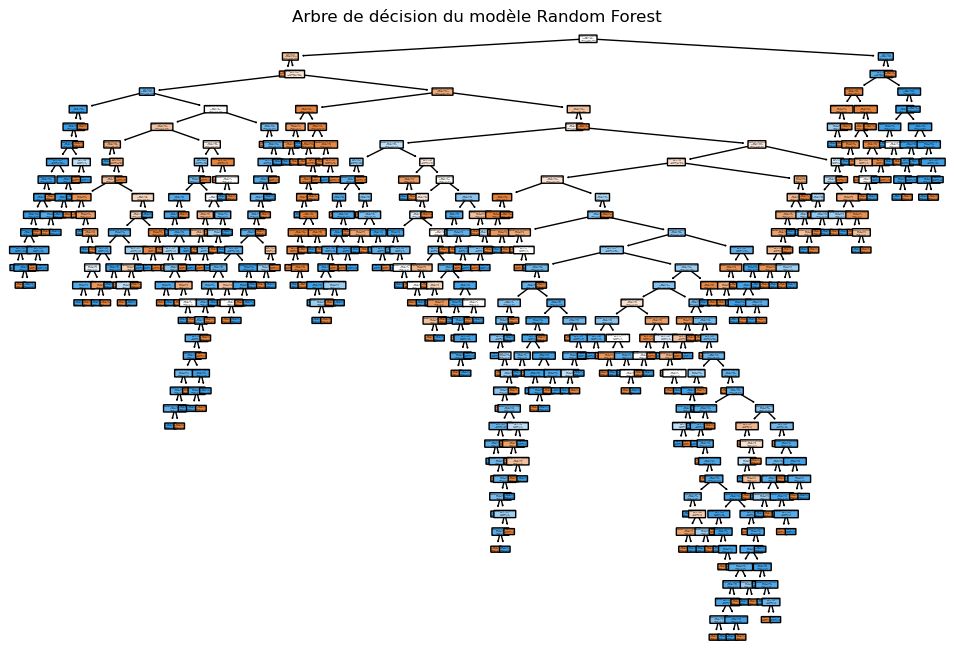

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


# Créer et entraîner le modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Sélectionner un arbre individuel (par exemple, le premier arbre de l'estimateur)
tree = rf_model.estimators_[0]

# Visualiser l'arbre
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=x_train.columns.tolist(), class_names=[str(i) for i in range(len(y_train.unique()))], filled=True, rounded=True)
plt.title('Arbre de décision du modèle Random Forest')
plt.show()


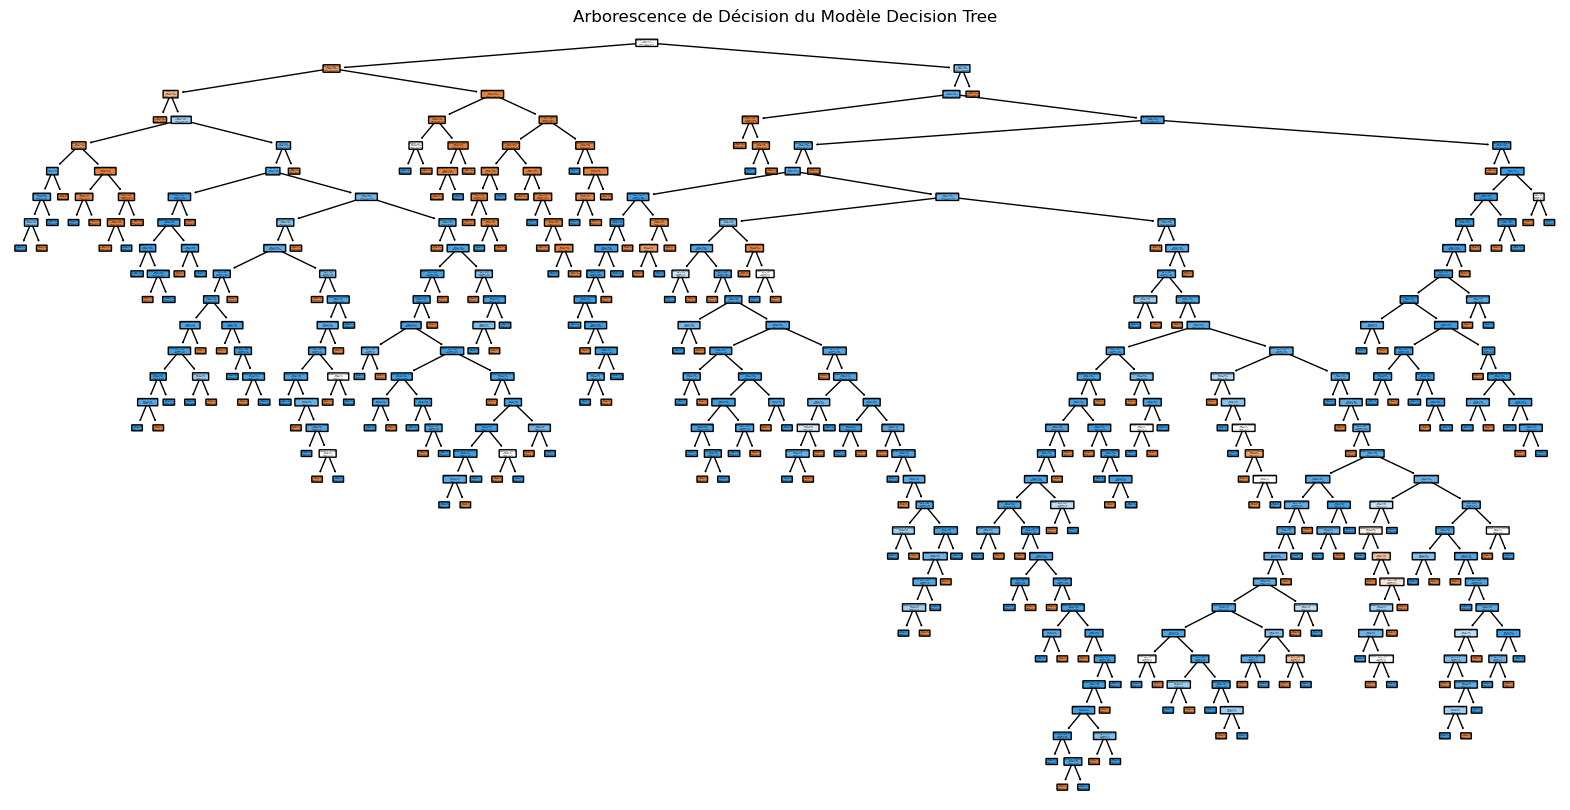

In [14]:
from sklearn.tree import plot_tree

# Remplacez `model_decision_tree` par votre modèle d'arbre de décision
model_decision_tree = DecisionTreeClassifier(random_state=42)

# Ajustez le modèle sur les données d'entraînement
model_decision_tree.fit(x_train, y_train)

# Tracez l'arborescence de décision
plt.figure(figsize=(20, 10))
plot_tree(model_decision_tree, filled=True, rounded=True, feature_names=x_train.columns, class_names=[str(i) for i in range(len(y_train.unique()))])
plt.title('Arborescence de Décision du Modèle Decision Tree')
plt.show()
